<a href="https://colab.research.google.com/github/galdir/Deep-Learning-Previsao-com-Keras/blob/master/Previsao_de_passageiros_por_ano.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 1

## Carregando os dados

In [1]:
import pandas as pd

In [2]:
passageiros = pd.read_csv('Passageiros.csv')

In [3]:
passageiros.head()

,tempo,passageiros
0,1949.000000,112
1,1949.083333,118
2,1949.166667,132
3,1949.250000,129
4,1949.333333,121


In [4]:
import seaborn as sns

In [5]:
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (10, 6)
mpl.rcParams['font.size'] = 22

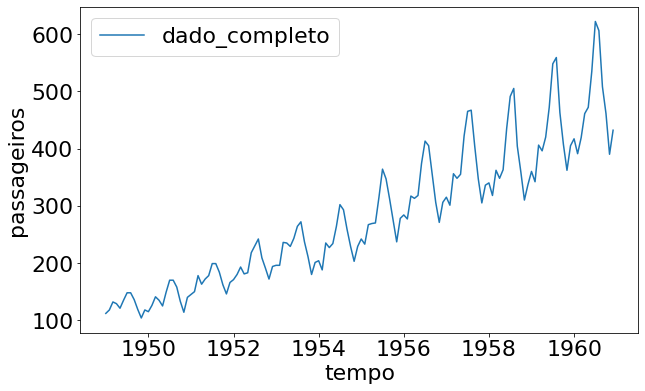

In [6]:
sns.lineplot(x='tempo',y='passageiros', data=passageiros,label='dado_completo') 

## Escalando os dados

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()

In [9]:
sc.fit(passageiros)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [10]:
dado_escalado = sc.transform(passageiros)

In [11]:
x=dado_escalado[:,0] #Features - Características - Tempo
y=dado_escalado[:,1] #Alvo - Número de passageiros

In [12]:
import matplotlib.pyplot as plt

Text(0.5, 0, 'Data')

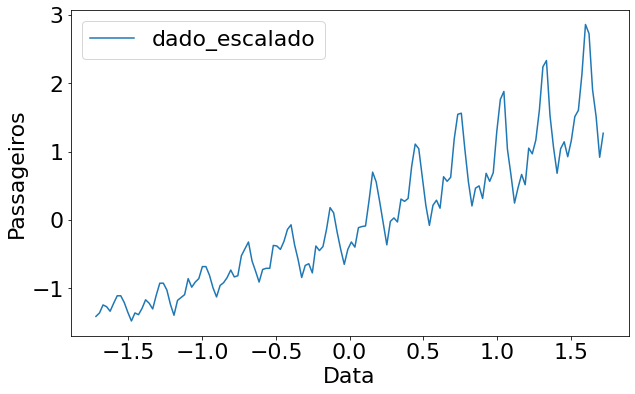

In [13]:
sns.lineplot(x=x,y=y,label='dado_escalado') 
plt.ylabel('Passageiros')
plt.xlabel('Data')

## Dividindo em treino e teste

In [14]:
tamanho_treino = int(len(passageiros)*0.9) #Pegando 90% dos dados para treino
tamanho_teste = len(passageiros)-tamanho_treino #O resto vamos reservar para teste

In [15]:
xtreino = x[0:tamanho_treino]
ytreino = y[0:tamanho_treino]

In [16]:
xteste = x[tamanho_treino:len(passageiros)]
yteste = y[tamanho_treino:len(passageiros)]

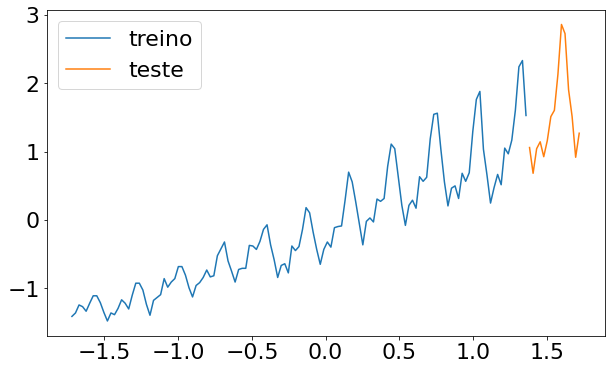

In [17]:
sns.lineplot(x=xtreino,y=ytreino,label='treino') 
sns.lineplot(x=xteste,y=yteste,label='teste') 

# Aula 2

## Regressão Linear

In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [19]:
regressor = Sequential()

In [20]:
regressor.add(Dense(1, input_dim=1, kernel_initializer='Ones', 
                    activation='linear',use_bias=False))

In [21]:
regressor.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
regressor.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 1         
Total params: 1
Trainable params: 1
Non-trainable params: 0
_________________________________________________________________


In [23]:
regressor.fit(xtreino,ytreino)

5/5 [==============================] - 0s 1ms/step - loss: 0.1285


In [24]:
y_predict= regressor.predict(xtreino) #Prevendo os dados de treino (o ajuste)

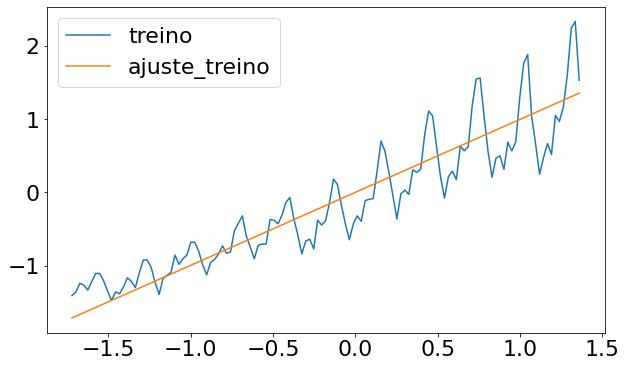

In [25]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')

In [26]:
d = {'tempo': xtreino, 'passageiros': y_predict[:,0]}
resultados = pd.DataFrame(data=d)

In [27]:
resultados

,tempo,passageiros
0,-1.720064,-1.713287
1,-1.696007,-1.689325
2,-1.671950,-1.665363
3,-1.647894,-1.641401
4,-1.623837,-1.617439
...,...,...
124,1.262984,1.258008
125,1.287041,1.281970
126,1.311098,1.305932
127,1.335155,1.329894


In [28]:
resultado_transf = sc.inverse_transform(resultados)

In [29]:
resultado_transf = pd.DataFrame(resultado_transf)
resultado_transf.columns = ['tempo','passageiros']

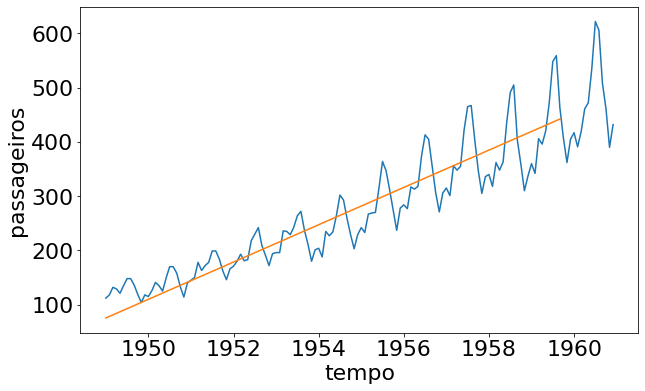

In [30]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros)
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf)

In [31]:
y_predict_teste= regressor.predict(xteste) #Prevendo os dados de teste(o futuro)

In [32]:
d = {'tempo': xteste, 'passageiros': y_predict_teste[:,0]}
resultados_teste = pd.DataFrame(data=d)

In [33]:
resultado_transf_teste = sc.inverse_transform(resultados_teste)

In [34]:
resultado_transf_teste = pd.DataFrame(resultado_transf_teste)
resultado_transf_teste.columns = ['tempo','passageiros']

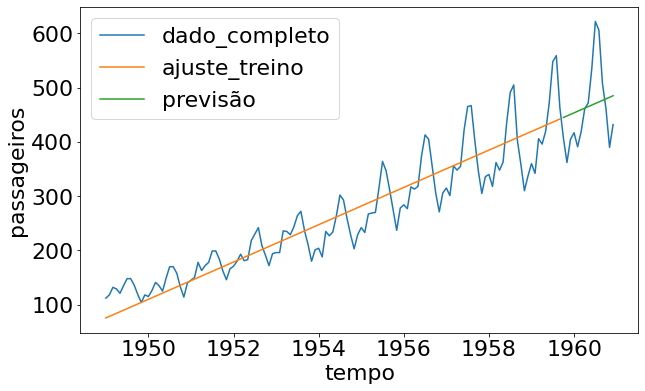

In [35]:
sns.lineplot(x="tempo",y="passageiros",data=passageiros,label='dado_completo')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf,label='ajuste_treino')
sns.lineplot(x="tempo",y="passageiros",data=resultado_transf_teste,label='previsão')

## Regressão não-linear

In [36]:
regressor2 = Sequential()

In [37]:
regressor2.add(Dense(8, input_dim=1, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False)) 
regressor2.add(Dense(8, kernel_initializer='random_uniform', 
                     activation='sigmoid',use_bias=False))
regressor2.add(Dense(1, kernel_initializer='random_uniform', 
                     activation='linear',use_bias=False))

In [38]:
regressor2.compile(loss='mean_squared_error',optimizer='adam')
regressor2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 64        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 80
Trainable params: 80
Non-trainable params: 0
_________________________________________________________________


In [39]:
regressor2.fit(xtreino,ytreino,epochs =500)

Epoch 1/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7925
Epoch 2/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7910
Epoch 3/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7917
Epoch 4/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7922
Epoch 5/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7912
Epoch 6/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7904
Epoch 7/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7884
Epoch 8/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7878
Epoch 9/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7874
Epoch 10/500
5/5 [==============================] - 0s 2ms/step - loss: 0.7870
Epoch 11/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7861
Epoch 12/500
5/5 [==============================] - 0s 1ms/step - loss: 0.7848
Epoch 13/500
5/5 [==============================] - 0s 1ms/st

In [40]:
y_predict= regressor2.predict(xtreino) #Prevendo os dados de treino (o ajuste)

In [41]:
y_predict_teste= regressor2.predict(xteste) #Prevendo os dados de teste(o futuro)

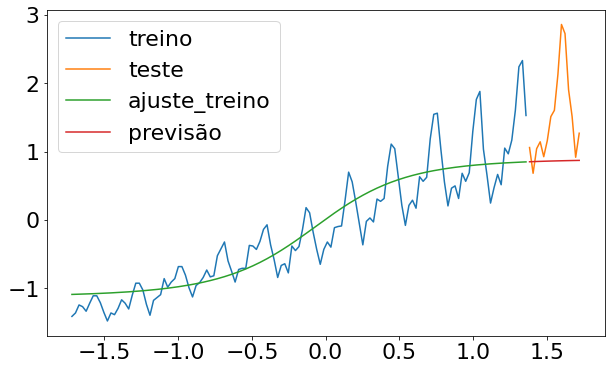

In [42]:
sns.lineplot(x=xtreino,y=ytreino,label='treino')
sns.lineplot(x=xteste,y=yteste,label='teste')
sns.lineplot(x=xtreino,y=y_predict[:,0],label='ajuste_treino')
sns.lineplot(x=xteste,y=y_predict_teste[:,0],label='previsão')

# Aula 3

## Alterando a forma como passamos os dados

Agora x e y vão valores diferentes. X vai conter o número de passageiros em um tempo anterior e y vai conter o número de passageiros em t+1, por exemplo. 

In [43]:
vetor = pd.DataFrame(ytreino)[0]

In [44]:
import numpy as np

In [45]:
def separa_dados(vetor,n_passos):
  """Entrada: vetor: número de passageiros
               n_passos: número de passos no regressor
     Saída:
              X_novo: Array 2D 
              y_novo: Array 1D - Nosso alvo
  """
  X_novo, y_novo = [], []
  for i in range(n_passos,vetor.shape[0]):
    X_novo.append(list(vetor.loc[i-n_passos:i-1]))
    y_novo.append(vetor.loc[i])
  X_novo, y_novo = np.array(X_novo), np.array(y_novo) 
  return X_novo, y_novo

In [46]:
xtreino_novo, ytreino_novo = separa_dados(vetor,1)

In [47]:
xtreino_novo[0:5] #X

array([[-1.40777884],
       [-1.35759023],
       [-1.24048348],
       [-1.26557778],
       [-1.33249593]])

In [48]:
ytreino_novo[0:5] #y

array([-1.35759023, -1.24048348, -1.26557778, -1.33249593, -1.21538918])

## Agora vamos separar o teste

In [49]:
vetor2 = pd.DataFrame(yteste)[0]

In [50]:
xteste_novo, yteste_novo = separa_dados(vetor2,1)

## Voltando para as redes neurais

In [51]:
regressor3 = Sequential()

In [52]:
regressor3.add(Dense(8, input_dim=1, kernel_initializer='ones', activation='linear',use_bias=False))
regressor3.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False))
regressor3.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor3.compile(loss='mean_squared_error',optimizer='adam')
regressor3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 8)                 8         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 64        
Total params: 584
Trainable params: 584
Non-trainable params: 0
_________________________________________________________________


In [53]:
regressor3.fit(xtreino_novo,ytreino_novo,epochs =100)

Epoch 1/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7706
Epoch 2/100
4/4 [==============================] - 0s 2ms/step - loss: 0.7518
Epoch 3/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7315
Epoch 4/100
4/4 [==============================] - 0s 1ms/step - loss: 0.7137
Epoch 5/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6896
Epoch 6/100
4/4 [==============================] - 0s 1ms/step - loss: 0.6661
Epoch 7/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6443
Epoch 8/100
4/4 [==============================] - 0s 2ms/step - loss: 0.6175
Epoch 9/100
4/4 [==============================] - 0s 2ms/step - loss: 0.5875
Epoch 10/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5565
Epoch 11/100
4/4 [==============================] - 0s 1ms/step - loss: 0.5208
Epoch 12/100
4/4 [==============================] - 0s 2ms/step - loss: 0.4846
Epoch 13/100
4/4 [==============================] - 0s 1ms/st

In [54]:
y_predict_novo = regressor3.predict(xtreino_novo)

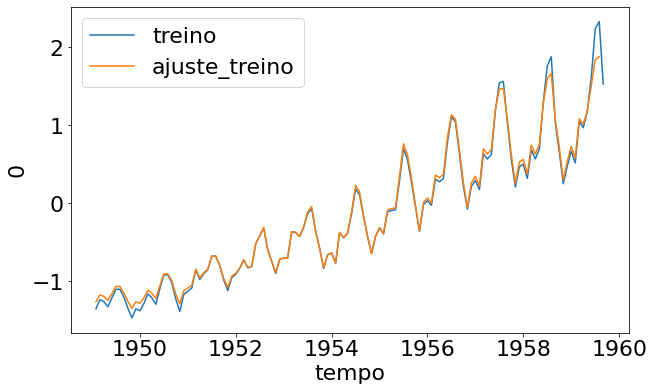

In [55]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

In [56]:
y_predict_teste_novo = regressor3.predict(xteste_novo)

In [57]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

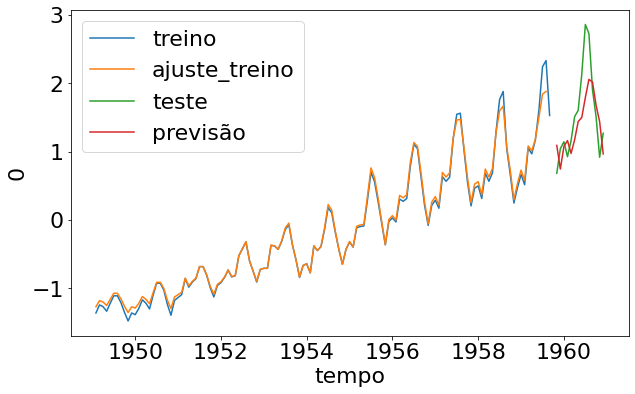

In [58]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[1:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[1:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[130:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[130:144],label='previsão')

## Janelas

In [59]:
xtreino_novo, ytreino_novo = separa_dados(vetor,4)

In [60]:
xtreino_novo[0:5] #X

array([[-1.40777884, -1.35759023, -1.24048348, -1.26557778],
       [-1.35759023, -1.24048348, -1.26557778, -1.33249593],
       [-1.24048348, -1.26557778, -1.33249593, -1.21538918],
       [-1.26557778, -1.33249593, -1.21538918, -1.10664719],
       [-1.33249593, -1.21538918, -1.10664719, -1.10664719]])

In [61]:
ytreino_novo[0:5] #y

array([-1.33249593, -1.21538918, -1.10664719, -1.10664719, -1.20702441])

In [62]:
xteste_novo, yteste_novo = separa_dados(vetor2,4)

In [63]:
regressor4 = Sequential()

In [64]:
regressor4.add(Dense(8, input_dim=4, kernel_initializer='random_uniform', activation='linear',use_bias=False)) #relu
regressor4.add(Dense(64, kernel_initializer='random_uniform', activation='sigmoid',use_bias=False)) #relu
regressor4.add(Dense(1, kernel_initializer='random_uniform', activation='linear',use_bias=False))
regressor4.compile(loss='mean_squared_error',optimizer='adam')
regressor4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_7 (Dense)              (None, 8)                 32        
_________________________________________________________________
dense_8 (Dense)              (None, 64)                512       
_________________________________________________________________
dense_9 (Dense)              (None, 1)                 64        
Total params: 608
Trainable params: 608
Non-trainable params: 0
_________________________________________________________________


In [65]:
regressor4.fit(xtreino_novo,ytreino_novo,epochs =300)

Epoch 1/300
4/4 [==============================] - 0s 2ms/step - loss: 0.8124
Epoch 2/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7806
Epoch 3/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7613
Epoch 4/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7568
Epoch 5/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7591
Epoch 6/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7599
Epoch 7/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7578
Epoch 8/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7533
Epoch 9/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7456
Epoch 10/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7397
Epoch 11/300
4/4 [==============================] - 0s 1ms/step - loss: 0.7337
Epoch 12/300
4/4 [==============================] - 0s 2ms/step - loss: 0.7251
Epoch 13/300
4/4 [==============================] - 0s 1ms/st

In [66]:
y_predict_teste_novo = regressor4.predict(xteste_novo)

In [67]:
resultado = pd.DataFrame(y_predict_teste_novo)[0]

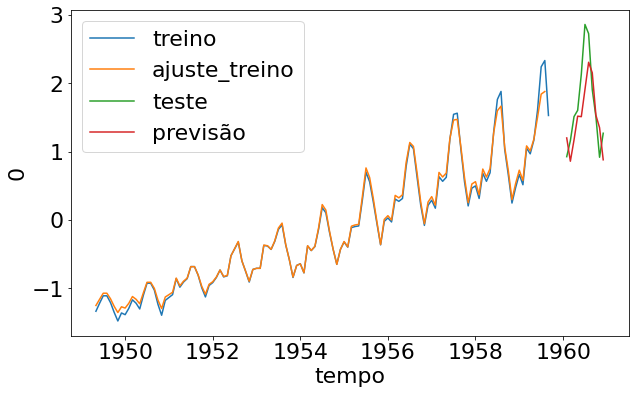

In [68]:
sns.lineplot(x='tempo',y=ytreino_novo,data=passageiros[4:129],label='treino')
sns.lineplot(x='tempo',y=pd.DataFrame(y_predict_novo)[0],data=passageiros[4:129],label='ajuste_treino')

sns.lineplot(x='tempo',y=yteste_novo,data=passageiros[133:144],label='teste')
sns.lineplot(x='tempo',y=resultado.values,data=passageiros[133:144],label='previsão')